In [32]:
import MeCab
import unidic

# MeCab に Unidic の辞書パスを指定
mecab = MeCab.Tagger(f"-d {unidic.DICDIR}")

# neko.txt を解析して neko.txt.mecab を生成
with open("neko.txt", "r", encoding="utf-8") as f, open("neko.txt.mecab", "w", encoding="utf-8") as f2:
    text = f.read()  # 一括読み込み（効率的）
    result = mecab.parse(text)  # 形態素解析
    f2.write(result)  # ファイルに書き出し

print("MeCabの解析が完了し、neko.txt.mecab に保存されました。")


MeCabの解析が完了し、neko.txt.mecab に保存されました。


### 30. 形態素解析結果の読み込み

In [38]:
def parse_mecab(file_path):
    sentences = []
    sentence = []

    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line == "EOS":  # 文の終わり
                if sentence:
                    sentences.append(sentence)
                    sentence = []
                continue
            parts = line.split("\t")
            if len(parts) < 2:  # タブ区切りの要素が足りない場合はスキップ
                continue
            
            surface = parts[0]
            details = parts[1].split(",")
            
            # details が 7つ未満の場合、基本形を表層形（surface）にする
            base = details[6] if len(details) > 6 else surface
            
            morph = {
                "surface": surface,  # 表層形
                "base": base,        # 基本形（データ不足の場合は表層形）
                "pos": details[0],   # 品詞
                "pos1": details[1]   # 品詞細分類1
            }
            sentence.append(morph)

    return sentences

# 解析結果を取得
sentences = parse_mecab("neko.txt.mecab")
for sentence in sentences[:3]:
    print(sentence[:5])


[{'surface': '一', 'base': 'イチ', 'pos': '名詞', 'pos1': '数詞'}, {'surface': '吾輩', 'base': 'ワガハイ', 'pos': '代名詞', 'pos1': ''}, {'surface': 'は', 'base': 'ハ', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': 'ネコ', 'pos': '名詞', 'pos1': '普通名詞'}, {'surface': 'で', 'base': 'ダ', 'pos': '助動詞', 'pos1': ''}]


### 31. 動詞の表層形を抽出

In [46]:
verbs = {morph["surface"] for sentence in sentences for morph in sentence if morph["pos"] == "動詞"}
print(verbs)


{'償わ', '向き直る', '通ら', '立て切っ', 'なくなっ', 'くれれ', '引き裂い', '破れ', '化する', '注い', '差し引か', '吐く', '飛び下り', '取り', '売り', '驚い', '飛び込ん', 'あるく', 'きめ', '立てる', 'なさい', '買え', '買う', '垂れる', '見つかれ', '破ら', 'おっしゃる', 'あったまり', '引い', 'とまら', '掘り', 'いらしっ', '尖がっ', 'よべ', '拾っ', '着換える', '変りゃ', '産する', 'かえっ', '干し', '痛み入っ', '叩き上げ', '押し込む', '見張っ', '忌む', '奪っ', '下ら', 'かかり', '詰め', '引っ掻い', 'しまえ', '志す', '罵る', '読みとばす', '振る', '縮ま', '飛', '来ん', '抜こう', '逃げ', '考え込む', '折れん', '飛びつい', '尋ねあて', '指す', '眠れ', '暮れれ', '踏み', '切り抜ける', '容れ', 'やっ', '悟る', '張り上げ', '忍ん', '化せ', '聞き合わせ', '応ずる', '捲き上げ', '朽ち', '減り', '落ちん', '隠れ', '出張っ', '告げん', '起ら', 'やろう', '引き掻か', '引き下がっ', '差支え', '出逢え', '叩き出す', '泣か', '思い', '惚れ', '下ろし', '生れつい', '分捕っ', '貰え', '掻きむしる', '陳べ', 'あらし', '嵌っ', '容る', '襲う', '申し合せ', '与え', '驚き', '積っ', 'あこがれ', '歩行い', '見届け', 'つけ加え', '拾わ', '上がっ', '占め', '聴く', '引き掻き', '防ぐ', 'つける', '鳴らす', '見おろす', 'かがやい', '思い出し', '着', 'こぼれ落ちる', '膨れ返っ', '疑わ', '聞き返し', 'わかれる', '合せる', 'かかっ', '持ち切っ', '片づい', '願い', '飛びつく', '喰い下がっ', '担い', '話せる', 'しまおう', '惚れ込ん', '寄りつか', '酔っ払っ', '察せ', '集ま

### 32. 動詞の基本形を抽出

In [49]:
verb_bases = {morph["base"] for sentence in sentences for morph in sentence if morph["pos"] == "動詞"}
print(verb_bases)


{'オソレイル', 'カクスル', 'タスケル', 'ミムク', 'タマル', 'イタダク', 'シノバス', 'オウズル', 'ヤケル', 'フキカケル', 'ゴザンス', 'ジレル', 'ヒキハラウ', 'キキツケル', 'ヒキサク', 'ソリカエス', 'トケル', 'コボス', 'ハリアゲル', 'オチイラス', 'スベリオチル', 'マス', 'スズム', 'ノル', 'カケコム', 'トドケル', 'ウズクマル', 'ノバス', 'ミアワセル', 'ミチル', 'トビコム', 'ヨブ', 'ニナウ', 'ナガメル', 'シルス', 'オシツブス', 'カマエコム', 'ミマワス', 'ゲスル', 'ヤル', 'カキツケル', 'ノノシリアウ', 'ウチツケル', 'カツギコム', 'フキトオス', 'ハシル', 'ノゾキコム', 'カサナル', 'オイツク', 'ミクダス', 'カギル', 'ナキタテル', 'コウズル', 'フミキル', 'ナオス', 'フク', 'モトメル', 'オキル', 'シャクイアゲル', 'ウチトル', 'サソウ', 'スリヌケル', 'キキホレル', 'キワメル', 'コラス', 'ツキアウ', 'イソグ', 'テンズル', 'ツキモドス', 'クイツク', 'ヨミカケル', 'ノベル', 'サテオク', 'アガリコム', 'ムス', 'ホドコス', 'マタス', 'カタヅク', 'ヒネル', 'ナノル', 'シコム', 'スベラス', 'ウラム', 'スギル', 'ヨビツケル', 'ノケル', 'キヨメル', 'カマウ', 'ナガレコム', 'パクツク', 'ヒックリカエル', 'キラス', 'ヒキクラベル', 'モタセル', 'オトロエル', 'ニアウ', 'トドケデル', 'タケル', 'チガウ', 'キリヤブル', 'コトタル', 'ソムク', 'スリツブス', 'トリオトス', 'ハリタテル', 'ツカウ', 'ウリトバス', 'ナメル', 'サキダツ', 'マトマル', 'ヒョウスル', 'シマウ', 'ミハル', 'ムサボル', 'コトワル', 'ハレル', 'シュクスル', 'シカメル', 'ミツカル', 'クイキル', 'イイアウ', 'コワレル', 'ヨコス', 'ツカサドル', 'キカス', 'ヒッコメ

### 33. 「AのB」構造の名詞句を抽出

In [52]:
noun_phrases = [
    f"{sentence[i]['surface']}の{sentence[i+2]['surface']}"
    for sentence in sentences
    for i in range(len(sentence) - 2)
    if sentence[i]["pos"] == "名詞" and sentence[i+1]["surface"] == "の" and sentence[i+2]["pos"] == "名詞"
]
print(noun_phrases)


['掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '藁の上', '笹原の中', '池の前', '一樹の蔭', '垣根の穴', '隣家の三毛', '時の通路', '一刻の猶予', '家の内', '以外の人間', '前の書生', '胸の痞', '家の主人', '主人の方', 'なしの小猫', '鼻の下', '自分の住家', '家のもの', 'うちのもの', '本の上', '皮膚の色', '本の上', '以外のもの', '主人の傍', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'うちの小供', '小供の寝床', '小供の一人', '例の神経', '次の部屋', '自分の勝手', 'へっついの中', '台所の板の間', '家の書生', '裏の池', '親子の愛', '隣りの三毛', '目刺の頭', '鰡の臍', '軍人の家', '代言の主人', '教師の家', '猫の時節', '家の主人', '胃弱の癖', '後架の中', '平の宗盛', '月の月給', '主人の述懐', '金縁の眼鏡', '主人の顔', '室内の想像', '訳のもの', '利の大家', '金縁の裏', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '斑入りの皮膚', '主人の彩色', '一種の色', '身内の筋肉', '主人の予定', '座敷の中', '人の気', '自己の力量', '人間の不徳', '家の裏', 'うちの小供', '日の二', 'たこの茶園', '茶の木', '木の根', '西側の杉垣', '杉垣のそば', '他の庭内', '皮膚の上', '柔毛の間', '嘆賞の念', '好奇の心', '小春の風', '杉垣の上', '梧桐の枝', '枯菊の茂み', '真丸の眼', '人間の珍重', '双眸の奥', '額の上', '声の底', '教師の家', '良家の猫', '車屋の黒', '車屋の黒', '主義の的', '軽侮の念', '左の問答', '車屋の方', 'うちの主人', '車屋の猫', '教師の方', '腹の足し', '車屋の黒', '相当の気焔', '茶畠の中', '黒の比較', '鼻の先', '自分の手柄', '墻壁の欠', '鼠の百', '掃除の時', 'うちの亭主', '石灰の袋',

### 34. 名詞の連接（最長一致）を抽出

In [55]:
longest_noun_sequence = []
for sentence in sentences:
    temp_sequence = []
    for morph in sentence:
        if morph["pos"] == "名詞":
            temp_sequence.append(morph["surface"])
        else:
            if len(temp_sequence) > 1:
                longest_noun_sequence.append("".join(temp_sequence))
            temp_sequence = []
print(longest_noun_sequence)


['時妙', '一毛', '後猫', '一度', '上今', 'うち池の上', '左り', '書生以外', '宿なし', 'まま奥', '終日書斎', '時々忍び足', '淡黄色', '二三ページ', '主人以外', '朝主人', '椽側', '一間', '神経胃弱', '時々同衾', '言語同断', '家内総がかり', '先日玉', '一部始終', '新体詩', '後架先生', '一月', '月給日', '水彩絵具', '毎日毎日書斎', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア', '星辰あり', '禽あり', '金魚あり', '寒鴉あり', '一幅', '椽側', '一分', '淡灰色', '今主人', '上不思議', '盲猫', 'いくらアンドレア', '一分', 'あと大', '馬鹿野郎', '馬鹿野郎', '馬鹿野郎呼わり', '馬鹿野郎', 'みんな増長', '数倍', '十坪', '腹加減', '二時頃', '前後不覚', '少々言葉', '乱暴猫', '同盟敬遠主義', 'ゆき感じ', '少々軽侮', '車屋相当', '不徳事件', '日例', '自慢話し', '手柄話', '年が年', '一度いたち', '最後っ屁', '百年', '五銭', '壱円五十銭', '少々気味', '鼠以外', '水彩画', '十二月一日', '水彩画', '水彩画家', '水彩画', '通人論', '水彩画', '主人はかく', '十二月四', '水彩画', '通り下手', '水彩画', '水彩画家', '水彩画', '翌日例', '金縁眼鏡', '結果今日', 'アンドレア', '椽側', 'サルト事件', '時々冗談', '仏国革命', '日本文学会', '演説会', '百名', '歴史小説セオファーノ', '歴史小説', '女主人', '神経胃弱', '時ゃ別', '模様画', '実際奇警', '半分降参', '後跛', '最後屁', '天秤棒', '二三段', '三間半', '椽側', '毎日学校', '水彩画', '元朝早々主人', '絵端書', '交友某画家', '深緑り', '一応感服', '三世相', '絵端書', '絵端書', 'いくら猫', '一列一体', '自家固有', '張り具合', '垂れ加減', '粋無粋'

### 35. 単語の出現頻度を求める

In [58]:
from collections import Counter

words = [morph["surface"] for sentence in sentences for morph in sentence]
word_freq = Counter(words)

# 出現頻度順にソート
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
print(sorted_word_freq[:10])  # 上位10単語を表示


[('の', 9547), ('。', 7486), ('て', 7410), ('に', 7009), ('、', 6773), ('は', 6500), ('と', 6155), ('を', 6119), ('が', 5396), ('で', 4536)]


### 36. 頻度上位10語の棒グラフ

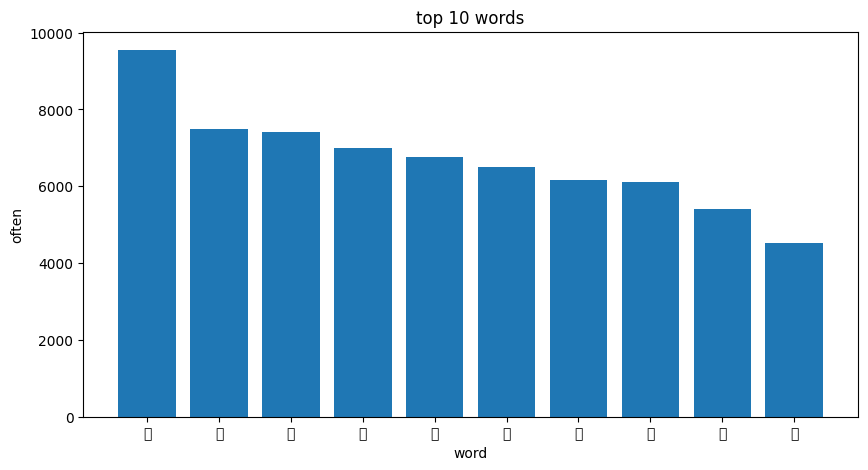

In [63]:
import matplotlib.pyplot as plt

top_words, top_counts = zip(*sorted_word_freq[:10])

plt.figure(figsize=(10, 5))
plt.bar(top_words, top_counts)
plt.xlabel("word")
plt.ylabel("often")
plt.title("top 10 words")
plt.show()


### 37. 「猫」と共起する単語の上位10語

/opt/anaconda3/envs/torch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/torch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36215 (\N{CJK UNIFIED IDEOGRAPH-8D77}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/torch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12300 (\N{LEFT CORNER BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/torch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29483 (\N{CJK UNIFIED IDEOGRAPH-732B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/torch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Gly

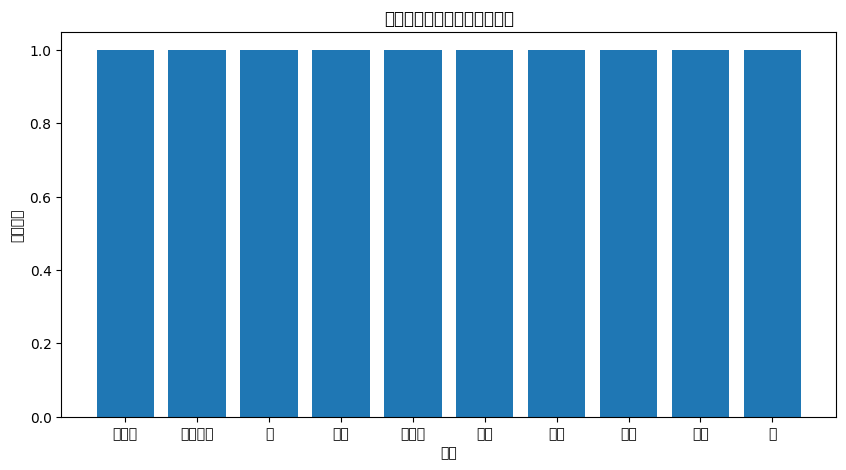

In [66]:
cooccurrence = Counter()

for sentence in sentences:
    words_in_sentence = {morph["surface"] for morph in sentence}
    if "猫" in words_in_sentence:
        cooccurrence.update(words_in_sentence - {"猫"})

top_cooccurrence = cooccurrence.most_common(10)
top_words, top_counts = zip(*top_cooccurrence)

plt.figure(figsize=(10, 5))
plt.bar(top_words, top_counts)
plt.xlabel("単語")
plt.ylabel("共起回数")
plt.title("「猫」と共起頻度の高い単語")
plt.show()


### 38. 単語の出現頻度のヒストグラム

/opt/anaconda3/envs/torch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12498 (\N{KATAKANA LETTER HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/torch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/torch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/torch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12464 (\N{KATAKANA LETTER GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/torch_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12521 (\N{KATAKANA LET

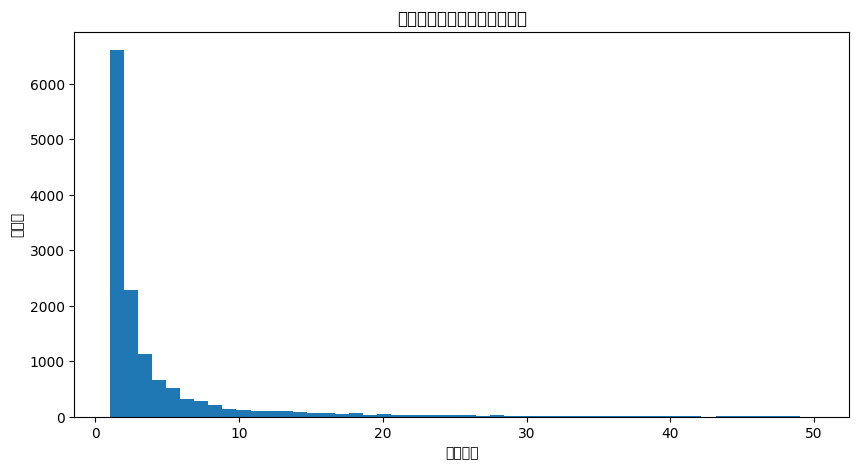

In [69]:
plt.figure(figsize=(10, 5))
plt.hist(word_freq.values(), bins=50, range=(1, 50))
plt.xlabel("出現頻度")
plt.ylabel("単語数")
plt.title("単語の出現頻度ヒストグラム")
plt.show()


### 39. Zipfの法則の検証
自然言語の単語の出現頻度は、その順位の逆数に比例する

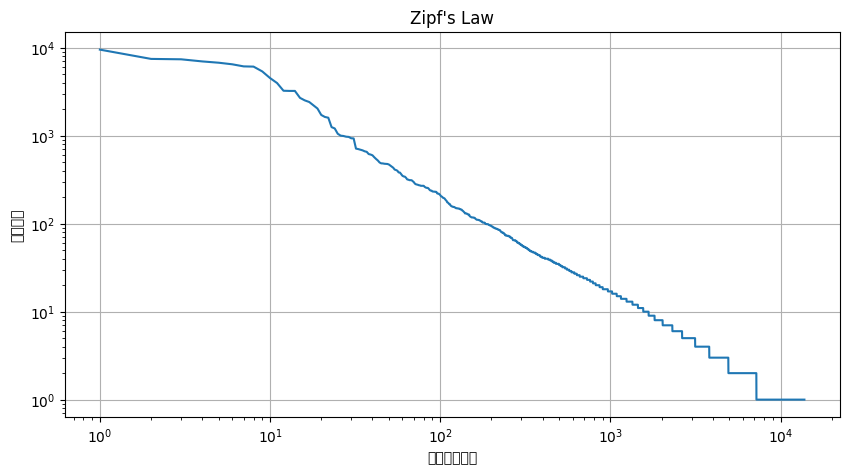

In [74]:
import numpy as np

ranks = np.arange(1, len(sorted_word_freq) + 1)
frequencies = np.array([freq for _, freq in sorted_word_freq])

plt.figure(figsize=(10, 5))
plt.loglog(ranks, frequencies)
plt.xlabel("出現頻度順位")
plt.ylabel("出現頻度")
plt.title("Zipf's Law")
plt.grid(True)
plt.show()
